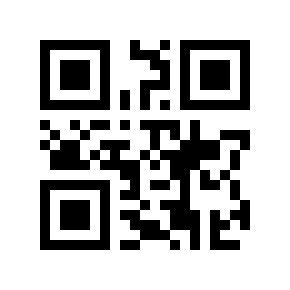

In [7]:
import qrcode
qrcode.make()

## HW1 

Implement the Gradient Based Methods (not covered in the lecture, to be discussed in the seminar; see below for the algorithm) in the four arm bernoulli bandit example (Lecture 1, Page 27). 

- Set the termination time to 1000
- Consider three choices of $\eta$, corresponding to 0.1, 1 and 10
- Plot the average reward and regret for each choice of $\eta$

![gradient_based](./graphs/gradient_based_lecture.png)
![gradient_based](./graphs/gradient1.png)
![gradient_based](./graphs/gradient2.png)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

# you might see an error that the module "tkinter" is not installed. If on Mac Os you can install it through the terminal via "brew install python-tk@3.9". General help can as always be found on stackoverflow: "https://stackoverflow.com/questions/25905540/importerror-no-module-named-tkinter" 

np.random.seed(10)

bandit_probabilities = [0.10, 0.40, 0.10, 0.10]

number_of_bandits = len(bandit_probabilities) # = n_actions
    
action_space = np.arange(number_of_bandits) # =[0,1,2,3]

number_of_trials = 20 
timesteps = 1000

arms = np.zeros(timesteps, dtype=int)

def step(action):
    rand = np.random.random()  # [0.0,1.0)
    reward = 1.0 if (rand < bandit_probabilities[action]) else 0.0
    return reward

def compute_regret(bandit_probabilities, arms, time_steps):
    probs = [bandit_probabilities[arm] for arm in arms]
    return np.cumsum(np.ones(time_steps)) * np.amax(bandit_probabilities) - np.cumsum(probs)


def cumulative_average_mean(r, n):
    return np.cumsum(r) / np.cumsum(np.ones(n))


def plot_rewards(reward_list, n):
    for r in reward_list:
        plt.plot(cumulative_average_mean(r[0], n), linewidth=3)
    plt.xlabel('Steps')
    plt.ylabel('Average reward')
    legend_str = [r[1] for r in reward_list]
    plt.legend(legend_str)
    plt.show()

def plot_regrets(regrets):
    for a in regrets:
        plt.plot(a[0], linewidth=3)
    plt.xlabel('Steps')
    plt.ylim(0.0,50.0)
    plt.ylabel('Regret')
    legend_str = [r[1] for r in regrets]
    plt.legend(legend_str)
    plt.show()

In [5]:
gradient_method_constants = [0.1, 1.0, 10]

def gradient_based_policy(actions, probabilities):
    return np.random.choice(actions, p=probabilities)
   
def apply_gradient_based_method(n_bandits, action_space, n_trials, timesteps,  arms, eta_parameters):
    rewards = np.zeros((len(eta_parameters), n_trials, timesteps), dtype=float)
    regrets = np.zeros((len(eta_parameters), n_trials, timesteps), dtype=float)

    for eta_parameter_counter, eta_parameter in enumerate(eta_parameters):
        for trial in range(n_trials):
            n = np.zeros(n_bandits, dtype=int)
            q = np.zeros(n_bandits, dtype=float)
            preference_scores = np.zeros(n_bandits, dtype=float)
            trial_rewards = rewards[eta_parameter_counter, trial, :]

            for t in range(timesteps):
                probabilities = np.asarray([np.exp(preference_score) for preference_score in preference_scores])
                probabilities /= np.sum(probabilities)
                action = gradient_based_policy(action_space, probabilities)

                r = step(action)

                # updating action counter and expected reward Q
                n[action] += 1
                q[action] = q[action] + 1.0 / (n[action] + 1) * (r - q[action])
                
                average_trial_reward = np.sum(trial_rewards)/(t+1)
                action_indicator = np.zeros(n_bandits, dtype=float)
                action_indicator[action] = 1.0
                preference_scores += eta_parameter * (r - average_trial_reward) * (action_indicator - probabilities)
                trial_rewards[t] += r
                arms[t] = action

            regret = compute_regret(bandit_probabilities, arms, timesteps)
            regrets[eta_parameter_counter, trial, :] += regret

    rewards = np.mean(rewards, axis=1)
    regrets = np.mean(regrets, axis=1)
    
    rewards = list(rewards) 
    regrets = list(regrets)
    
    legend_entries = ["gradient $\eta=" + str(eta_parameter) + "$" for eta_parameter in eta_parameters] 

    rewards = list(zip(rewards, legend_entries))
    regrets = list(zip(regrets, legend_entries))

    return rewards,regrets

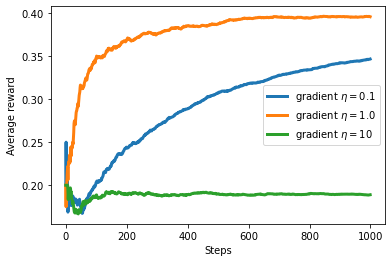

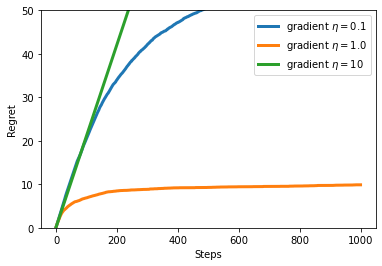

In [6]:
rewards_gradient, regrets_gradient = apply_gradient_based_method(number_of_bandits, action_space, number_of_trials, timesteps, arms, gradient_method_constants)
plot_rewards(rewards_gradient, timesteps)
plot_regrets(regrets_gradient)